#### Estimación de Trayectoria con Kalman

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as co
from numpy.linalg import inv

Toma de datos de la Trayectoria de dos vehículos

In [9]:
df1 = pd.read_csv('datos_veh32.csv',sep=';' )
df2 = pd.read_csv('datos_veh33.csv',sep=';' )

In [10]:
df1.loc[137:167]

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
137,137.0,221.23,veh32,39910453_0,5.10,0.0,22.62,veh_passenger,578.19,2630.63
138,138.0,221.23,veh32,39910453_0,27.00,0.0,21.90,veh_passenger,563.65,2614.03
139,139.0,216.79,veh32,39910453_0,49.05,0.0,22.05,veh_passenger,549.88,2596.64
140,140.0,216.79,veh32,39910453_0,70.75,0.0,21.70,veh_passenger,536.79,2579.13
141,141.0,212.22,veh32,39910453_0,93.06,0.0,22.31,veh_passenger,524.62,2560.25
142,142.0,210.13,veh32,39910453_0,115.26,0.0,22.19,veh_passenger,513.07,2541.11
143,143.0,210.13,veh32,39910453_0,137.76,0.0,22.51,veh_passenger,501.69,2521.51
144,144.0,207.01,veh32,39910453_0,159.51,0.0,21.75,veh_passenger,490.99,2502.41
145,145.0,207.01,veh32,39910453_0,181.72,0.0,22.21,veh_passenger,480.83,2482.48
146,146.0,202.37,veh32,39910453_0,204.03,0.0,22.31,veh_passenger,472.23,2461.72


Filtro los datos de las coordenadas "x" e "y" de cada vehículo (el 32 y el 33)

In [12]:
X1 = np.array(df1[["vehicle_x", "vehicle_y"]]) #Veh32
X2 = np.array(df2[["vehicle_x", "vehicle_y"]]) #Veh33

In [14]:
# Tomo los datos de Veh32 y Veh33 desde que pasan por el nodo :2153273020_0_0. Para el caso de Veh 32 
# es en el steptime 147 y para el veh33 en el 151

veh32_nodo_1_x = X1[147:172, 0] #Veh32
veh32_nodo_1_y = X1[147:172, 1] #Veh32

#veh32_nodo_1

veh33_nodo_1_x = X2[151:177, 0] #Veh32
veh33_nodo_1_y = X2[151:177, 1] #Veh32

In [15]:
#https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/
#Calculo la distancia desde el origen al móvil. Vendría a ser la trayectoria del Veh32

distancias_movil_1=[] # Veh32

for n in range(0,len(veh32_nodo_1_x)):
     distancias_movil_1.append (np.linalg.norm([veh32_nodo_1_x[n], veh32_nodo_1_y[n]])) # Norma de un vector

In [16]:
#Calculo la distancia desde el origen al móvil. Vendría a ser la trayectoria del Veh33

distancias_movil_2=[] # Veh33

for n in range(0,len(veh33_nodo_1_x)):
     distancias_movil_2.append (np.linalg.norm([veh33_nodo_1_x[n], veh33_nodo_1_y[n]])) # Norma de un vector

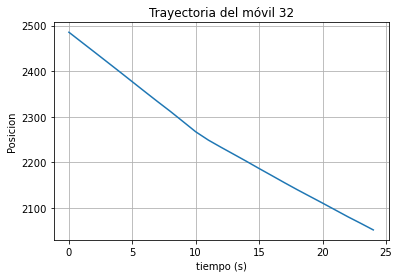

In [19]:
#Grafico la trayectoria de uno de los vehículos
t=np.arange(0,len(distancias_movil_1),1)

plt.plot(t, distancias_movil_1)
plt.title('Trayectoria del móvil 32') 
plt.xlabel('tiempo (s)')
plt.ylabel('Posicion')
plt.grid()

In [112]:
y  = np.array(distancias_movil_1)  #Trayectoria sin ruido

y1 = y + 50* np.random.rand(len(y)) #Trayectoria con ruido

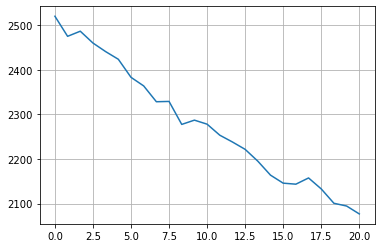

In [113]:
#Trayectoria con ruido
plt.plot(t,y1)    
plt.grid()

### Kalman
Se utiliza un que filtro contemple la posición y la velocidad del móvil. Utiliza un sensor para leer la posición.



In [114]:
tam_vec = len(y)
u = np.ones([1, tam_vec])
A = np.matrix([[1 ,0.1],
                [0, 1]]) # F
B = np.matrix([[0 ],
                [0]]) # F
C = np.matrix([[1.,0.]]) # H
P = np.matrix([[1,0],
                [0, 1] ]) # Matriz de Covarianza, P
R = 0.05 # R
Q = np.matrix([[2.,0.],
                [0., 2.] ]) # Matriz de Covarianza, Q

Con estas matrices se procede al loop de predicción/actualización

In [115]:
#La trayectoria con ruido es y1(t)
#La trayectoria sin ruido es y(t)

#Condiciones iniciales
x = np.zeros([2, 2])

for i in range (2, tam_vec):

#Predicción

#Por la forma en que se filtran los datos de "x", hay que trasponer a A.x para que quede de 2x1.
#De otra forma, no hay que trasponer a A.x

    xk = np.transpose(np.dot(A,x[:,i-1])) + B*u[:,i-1] 
    
    Pk = np.dot(np.dot(A,P[:,(i-2,i-1)]),np.transpose(A)) + Q
    
# Ganancia     
    K =  np.dot(np.dot(Pk,np.transpose(C)),inv(np.dot(np.dot(C,Pk),np.transpose(C))+R))      #Ganancia de Kalman

#Actualización
    x1 = xk + K * (y1[i]-np.dot(C,xk))
    x = np.insert(x,i,[x1[0,0], x1[1,0]],axis=1)
    
    P1 = Pk - np.dot(K,np.dot(C,Pk))
    P = np.append(P,P1,axis=1)
 

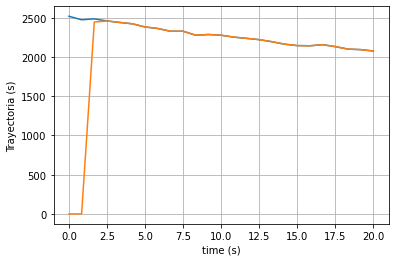

In [116]:
#t1 = np.linspace(0,20,len(y))

plt.plot(t,y1)    #Señal con ruido
#plt.plot(t1,y1)    #Señal sin ruido
plt.plot(t,x[0,:]) #Estimación Kalman

plt.xlabel('time (s)')
plt.ylabel('Trayectoria (s)')
plt.grid()

Momento en el que la trayectoria estimada se equipara con la real

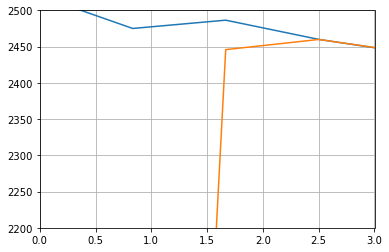

In [118]:
plt.plot(t,y1)    #Señal con ruido
plt.plot(t,x[0,:])
plt.xlim([0, 3]) 
plt.ylim([2200, 2500]) 
plt.grid()

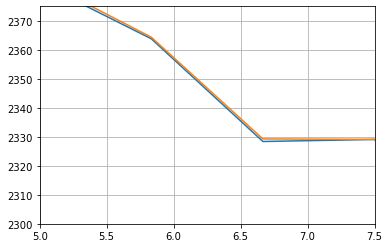

In [119]:
plt.plot(t,y1)    #Señal con ruido
plt.plot(t,x[0,:])
plt.xlim([5, 7.5]) 
plt.ylim([2300, 2375]) 
plt.grid()